<a href="https://colab.research.google.com/github/SainathReddy22/Tamato-disease-image-processing/blob/master/TAMATO_DISEASE_using_RESNET_50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!nvidia-smi

Fri Sep 25 07:01:23 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P0    37W / 250W |   8233MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [16]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [17]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/New Plant Diseases Dataset(Augmented)/train'
valid_path = '/content/drive/My Drive/New Plant Diseases Dataset(Augmented)/valid'

In [18]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [19]:
for layer in resnet.layers:
    layer.trainable = False

In [20]:
folders = glob('/content/drive/My Drive/New Plant Diseases Dataset(Augmented)/train/*')

In [21]:
x = Flatten()(resnet.output)

In [22]:
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=resnet.input, outputs=prediction)

In [23]:
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [24]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [26]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/New Plant Diseases Dataset(Augmented)/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 18346 images belonging to 10 classes.


In [27]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/New Plant Diseases Dataset(Augmented)/valid',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')


Found 4585 images belonging to 10 classes.


In [28]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
1147/1147 [==============================] - 259s 226ms/step - loss: 2.8851 - accuracy: 0.3261 - val_loss: 3.6917 - val_accuracy: 0.2968
Epoch 2/10
1147/1147 [==============================] - 255s 222ms/step - loss: 2.4861 - accuracy: 0.4389 - val_loss: 2.6245 - val_accuracy: 0.5032
Epoch 3/10
1147/1147 [==============================] - 259s 226ms/step - loss: 2.3056 - accuracy: 0.4841 - val_loss: 2.1335 - val_accuracy: 0.4992
Epoch 4/10
1147/1147 [==============================] - 253s 221ms/step - loss: 2.1135 - accuracy: 0.5134 - val_loss: 2.4180 - val_accuracy: 0.4844
Epoch 5/10
1147/1147 [==============================] - 257s 224ms/step - loss: 2.1784 - accuracy: 0.5260 - val_loss: 2.5124 - val_accuracy: 0.5049
Epoch 6/10
1147/1147 [==============================] - 266s 232ms/step - loss: 2.1329 - accuracy: 0.5415 - val_loss: 2.4240 - val_accuracy: 0.5040
Epoch 7/10
1147/1147 [==============================] - 268s 234ms/step - loss: 2.1763 - accuracy: 0.5493 - val_

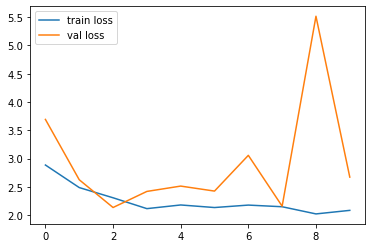

<Figure size 432x288 with 0 Axes>

In [31]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


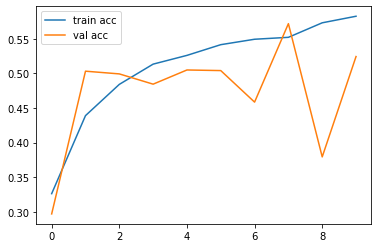

<Figure size 432x288 with 0 Axes>

In [32]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')